In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv')

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.shape

(13320, 9)

In [5]:
#Backing up the dataset
data = df.copy()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [7]:
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [8]:
#Since we have we data which wont help in finding dependent variable
df = df.drop(['area_type','society','balcony','availability'],axis=1)

In [9]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [10]:
df.isnull().sum() / len(df)

location      0.000075
size          0.001201
total_sqft    0.000000
bath          0.005480
price         0.000000
dtype: float64

**Since the dataset is huge and the missing values are very less in number we can drop these missing values**


In [11]:
df = df.dropna()

In [12]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [13]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [14]:
df['bhk'] = df['size'].str.split(" ").str.get(0).astype(int)

In [15]:
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   size        13246 non-null  object 
 2   total_sqft  13246 non-null  object 
 3   bath        13246 non-null  float64
 4   price       13246 non-null  float64
 5   bhk         13246 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 724.4+ KB


In [17]:
df['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

**We can observer that there are house with more than 20 bedrooms**

**Lets analyze those observations**

In [18]:
df[df['bhk']>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


There is an error is the observation!
43 bedrooms in 2400sqft is impossible !

For that we need to analyze total_sqft

In [19]:
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

Unique values shows that 

1. The type of the obsevration is object
2. There are few observations where the data is not a single values but its in Range


In [20]:
#Remove those range with average 

def is_float(x):
    try:
        float(x)
    except:
        return False
    return True


In [21]:
df[~df['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [22]:
def convert_sqrt_to_num(x):
    tokens = x.split("-")
    if len(tokens)==2 :
        return (float(tokens[0])+float(tokens[1]))/2
    
    try:
        return float(x)
    except:
        return None

In [23]:
convert_sqrt_to_num('21652')

21652.0

In [24]:
convert_sqrt_to_num('3067 - 8156')

5611.5

In [25]:
convert_sqrt_to_num('4125Perch')

In [26]:
df['total_sqft'] = df['total_sqft'].apply(convert_sqrt_to_num)
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [27]:
df.loc[30] #the range got converted into float

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   size        13246 non-null  object 
 2   total_sqft  13200 non-null  float64
 3   bath        13246 non-null  float64
 4   price       13246 non-null  float64
 5   bhk         13246 non-null  int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 1.2+ MB


In [29]:
#Price per sqft 

df['price_per_sqft'] = np.around(df['price']*100000/df['total_sqft'],4)
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.8106
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.3846
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.5556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.8909
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.0000


In [30]:
len(df.location.unique())

1304

There are 1304 unqiue locations

Applying one hot encoding would lead to **curse of dimension**

In [31]:
df['location'] = df['location'].apply(lambda x: x.strip())
location_stats  = df.groupby('location')['location'].count().sort_values(ascending=False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [32]:
# we see that there are many locations with jus 1 observation

len(location_stats[location_stats<=10])

1052

In [33]:
location_less_than_10 = location_stats[location_stats<=10]
location_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [34]:
len(df.location.unique())

1293

In [35]:
df['location'] = df['location'].apply(lambda x : 'other' if x in location_less_than_10 else x)
len(df.location.unique())

242

In [36]:
df.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.8106
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.3846
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.5556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.8909
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.0000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.8632
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.0571
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.8182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.2443
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.5098


## Outliers removal

<AxesSubplot:>

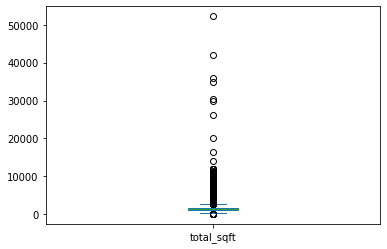

In [37]:
df['total_sqft'].plot.box()

In [38]:
#typically the sqft for one bedroom is 300
#we will use this domain knowledge to remove outliers

In [39]:
df[df['total_sqft']/df['bhk']<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.5098
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.3333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.9808
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.2963
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.0000


we see that 6 bedrooms in 1020 sqft is unusual and can be removed

In [40]:
df.shape

(13246, 7)

In [41]:
df = df[~(df['total_sqft']/df['bhk']<300)]
df.shape

(12502, 7)

<AxesSubplot:>

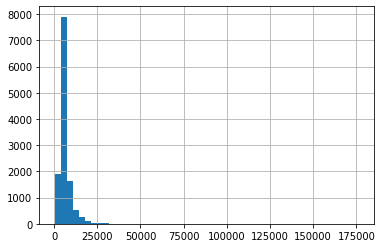

In [42]:
df.price_per_sqft.hist(bins=50)

<AxesSubplot:>

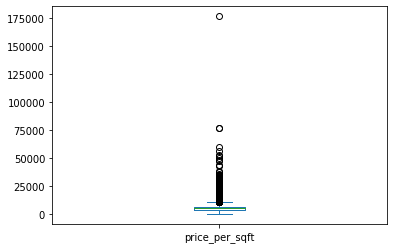

In [43]:
df.price_per_sqft.plot.box()

In [44]:
df.price_per_sqft.describe()

count     12456.000000
mean       6308.502825
std        4168.127339
min         267.829800
25%        4210.526300
50%        5294.117600
75%        6916.666700
max      176470.588200
Name: price_per_sqft, dtype: float64

In [45]:
# removing any data which is 1 Std away from the mean

def remove_outliers(df):
    df_out = pd.DataFrame()
    for key , sub_df in df.groupby('location'):
        mean  = sub_df['price_per_sqft'].mean()
        std = np.std(sub_df['price_per_sqft'])
        reduced_df = sub_df[(sub_df['price_per_sqft']>(mean-std)) & (sub_df['price_per_sqft']<=(mean+std))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df = remove_outliers(df)

In [46]:
df.shape

(10241, 7)

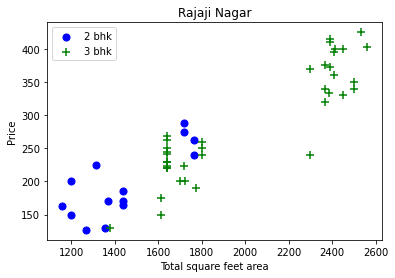

In [47]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 bhk',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='green',label='3 bhk',s=50)
    plt.xlabel('Total square feet area')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()

plot_scatter_chart(df,'Rajaji Nagar')

##### we Obsevre that for same sqft 3Bhk price is less than the 2bhk price
**Lets try to remove these outliers**

In [48]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std':  np.std(bhk_df.price_per_sqft),
                'count' : bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df = remove_bhk_outliers(df)

In [49]:
df.shape

(7329, 7)

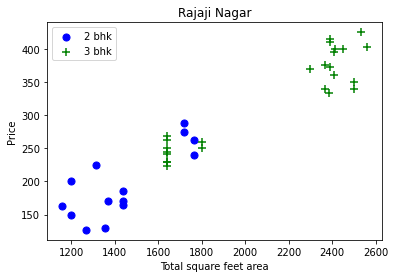

In [50]:
plot_scatter_chart(df,'Rajaji Nagar')

Text(0, 0.5, 'Count')

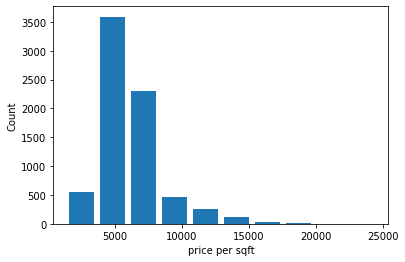

In [51]:
plt.hist(df.price_per_sqft,rwidth=0.8)
plt.xlabel('price per sqft')
plt.ylabel('Count')

we see that we have normal distribution 

In [52]:
df.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [53]:
## Observe that there are 16 13 bathrooms 
# lets analyze those observations
df[df.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.0000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.0000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.0000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.0000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.1244


Text(0, 0.5, 'Count')

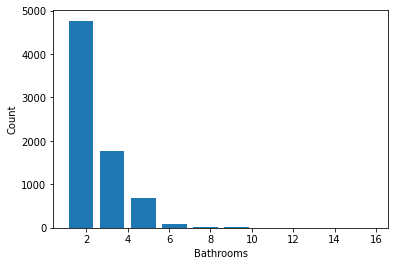

In [54]:
## Usually there will be bathrooms equal to number of bedrooms!Lets look into it
plt.hist(df.bath,rwidth=0.8)
plt.xlabel('Bathrooms')
plt.ylabel('Count')

In [55]:
df[df.bath>df.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.0325
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.5714
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.0343
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.8977


In [56]:
df = df[df.bath<df.bhk+2]
df.shape

(7251, 7)

In [57]:
#Lets drop unnecessary features

df = df.drop(['size','price_per_sqft'],axis='columns')
df.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [58]:
df.to_csv('Banglore_clean_dataset.csv')

## Handling Categorical Variables

In [59]:
dummies = pd.get_dummies(df['location'])
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
final_df = pd.concat([df,dummies.drop('other',axis=1)],axis=1)
final_df.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
final_df = final_df.drop(['location'],axis=1)

In [62]:
final_df.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
final_df.shape

(7251, 245)

In [64]:
## Grouping dependent and independent features

X = final_df.drop('price',axis=1)
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
y = final_df.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [72]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
lr.score(X_test,y_test)

0.8452277697874606

In [69]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=10)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.84522777, 0.80004632, 0.88682995, 0.842265  , 0.86250633])

### Using Different Models

In [73]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=10)
tree_reg.fit(X_train, y_train)
tree_reg.score(X_test,y_test)

0.7256233818240662

In [74]:
cross_val_score(DecisionTreeRegressor(),X,y,cv=cv)

array([0.72730802, 0.53356303, 0.79877541, 0.63839162, 0.53038172])

We can see that the accuracy varies

In [75]:
from sklearn.linear_model import Lasso

lass = Lasso()
lass.fit(X_train, y_train)
lass.score(X_test,y_test)

0.7237775279429011

In [76]:
cross_val_score(Lasso(),X,y,cv=cv)

array([0.72377753, 0.67007779, 0.74833161, 0.74743878, 0.67534292])

**The Linear regression model gives us the best result**

In [97]:
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=10)
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.8452277697874606

In [98]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns==location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index>=0:
        x[loc_index] = 1
    
    return lr.predict([x])[0]

In [99]:
predict_price('1st Phase JP Nagar',1000,2,2)

/home/chethancheths/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.49904677298646

In [100]:
predict_price('1st Phase JP Nagar',1000,3,3)

/home/chethancheths/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.80519395325982

In [101]:
predict_price('Indira Nagar',1000,2,2)

/home/chethancheths/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


181.27815484004782

In [102]:
predict_price('Indira Nagar',1000,2,3)

/home/chethancheths/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


179.5052770758278

In [103]:
import pickle
with open('banglore_home_price_model.pickle','wb') as f:
    pickle.dump(lr,f)

In [104]:
## Exporting Column Information


import json
columns = {
    'data_columns':[col.lower() for col in X.columns]
}

with open('columns.json','w') as f:
    f.write(json.dumps(columns))